In [ ]:
import pandas as pd

# ระบุที่อยู่บ้านของไฟล์ (ใส่ r นำหน้าเพื่อป้องกัน Error เรื่องเครื่องหมาย \ ครับ)
folder_path = r'D:\db\\'

# โหลดไฟล์โดยระบุ Path เต็มๆ
orders = pd.read_csv(folder_path + 'olist_orders_dataset.csv')
order_items = pd.read_csv(folder_path + 'olist_order_items_dataset.csv')
customers = pd.read_csv(folder_path + 'olist_customers_dataset.csv')

# เชื่อมตาราง (Merge) เหมือนที่เราตั้งใจไว้
df_master = orders.merge(order_items, on='order_id') \
                  .merge(customers, on='customer_id')

print("สำเร็จ! เจอไฟล์ใน D:\db และเชื่อมตารางเรียบร้อยแล้วครับ")
df_master.head()

สำเร็จ! เจอไฟล์ใน D:\db และเชื่อมตารางเรียบร้อยแล้วครับ


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [ ]:
# แปลงคอลัมน์วันที่ให้เป็นรูปแบบ Datetime
df_master['order_purchase_timestamp'] = pd.to_datetime(df_master['order_purchase_timestamp'])

# กำหนด "วันปัจจุบัน" สำหรับคำนวณ Recency (สมมติว่าเป็น 1 วันหลังจากวันที่มีการซื้อล่าสุดในข้อมูล)
snapshot_date = df_master['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# พระเอกของงาน: Groupby และคำนวณ R, F, M พร้อมกัน!
rfm_table = df_master.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days, # R: วันที่ล่าสุดลบวันนี้
    'order_id': 'nunique',                                              # F: นับจำนวน Order (ไม่ซ้ำ)
    'price': 'sum'                                                       # M: ยอดรวมเงินที่จ่าย
})

# เปลี่ยนชื่อคอลัมน์ให้ดูง่าย
rfm_table.columns = ['Recency', 'Frequency', 'Monetary']

# ดูผลลัพธ์
rfm_table.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
0000f46a3911fa3c0805444483337064,542,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
0004aac84e0df4da2b147fca70cf8255,293,1,180.00


In [6]:
# เช็คจำนวนแถวทั้งหมดในตาราง RFM
print(f"จำนวนลูกค้าทั้งหมดที่เราคำนวณได้: {len(rfm_table):,} ราย")

จำนวนลูกค้าทั้งหมดที่เราคำนวณได้: 95,420 ราย


In [ ]:
# แบ่งกลุ่ม 1-5 คะแนน (qcut จะแบ่งตามเปอร์เซ็นไทล์ให้เท่าๆ กัน)
# หมายเหตุ: Recency ยิ่งน้อยยิ่งดี เราเลยใส่ labels เรียงจาก 5 ไป 1 ครับ
rfm_table['R_Score'] = pd.qcut(rfm_table['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_table['F_Score'] = pd.qcut(rfm_table['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_table['M_Score'] = pd.qcut(rfm_table['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# รวมคะแนนเป็น RFM_Score 
rfm_table['RFM_Combined'] = rfm_table['R_Score'].astype(str) + \
                            rfm_table['F_Score'].astype(str) + \
                            rfm_table['M_Score'].astype(str)

rfm_table.head(10)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Combined
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,4,414
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411
0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5,215
0004bd2a26a76fe21f786e4fbd80607f,151,1,154.00,4,1,4,414
00050ab1314c0e55a6ca13cf7181fecf,136,1,27.99,4,1,1,411
00053a61a98854899e70ed204dd4bafe,187,1,382.00,3,1,5,315
0005e1862207bf6ccc02e4228effd9a0,548,1,135.00,1,1,4,114


In [ ]:
# สร้างฟังก์ชันสำหรับแบ่งกลุ่มตามคะแนน R และ F
def segment_customer(df):
    r = int(df['R_Score'])
    f = int(df['F_Score'])
    
    if r >= 4 and f >= 4:
        return 'Champions (สุดยอดลูกค้า)'
    elif r >= 3 and f >= 3:
        return 'Loyal Customers (ขาประจำ)'
    elif r >= 4 and f < 3:
        return 'New Customers (ลูกค้าใหม่)'
    elif r < 3 and f >= 3:
        return 'At Risk (เริ่มห่างเหิน)'
    else:
        return 'Lost (ขาจรที่หายไป)'

# นำฟังก์ชันไปใช้กับตาราง rfm_table
rfm_table['Segment'] = rfm_table.apply(segment_customer, axis=1)

# ดูผลลัพธ์สรุปว่าแต่ละกลุ่มมีกี่คน
segment_counts = rfm_table['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Customer_Count']
segment_counts

,Segment,Customer_Count
0,Lost (ขาจรที่หายไป),22885
1,At Risk (เริ่มห่างเหิน),22780
2,Loyal Customers (ขาประจำ),19195
3,New Customers (ลูกค้าใหม่),15283
4,Champions (สุดยอดลูกค้า),15277


In [ ]:
# โหลดข้อมูลหมวดหมู่สินค้า (ถ้ายังไม่ได้โหลด)
products = pd.read_csv(folder_path + 'olist_products_dataset.csv')
translation = pd.read_csv(folder_path + 'product_category_name_translation.csv')

# เชื่อมข้อมูล RFM กลับไปหาตารางหลักเพื่อดูหมวดหมู่สินค้า
df_lost_analysis = rfm_table.query("Segment == 'Lost (ขาจรที่หายไป)'") \
                            .merge(df_master, on='customer_unique_id') \
                            .merge(products, on='product_id') \
                            .merge(translation, on='product_category_name')

# สรุป Top 10 หมวดหมู่สินค้าที่กลุ่ม Lost เคยซื้อ
top_lost_categories = df_lost_analysis['product_category_name_english'].value_counts().head(10)

print("Top 10 สินค้าที่กลุ่ม Lost เคยซื้อ (ส่งโปรโมชั่นหมวดนี้ไปง้อด่วน!):")
print(top_lost_categories)

Top 10 สินค้าที่กลุ่ม Lost เคยซื้อ (ส่งโปรโมชั่นหมวดนี้ไปง้อด่วน!):
product_category_name_english
bed_bath_table           2437
sports_leisure           2101
furniture_decor          2010
health_beauty            1925
computers_accessories    1805
housewares               1379
watches_gifts            1217
garden_tools             1205
telephony                1205
toys                     1142
Name: count, dtype: int64


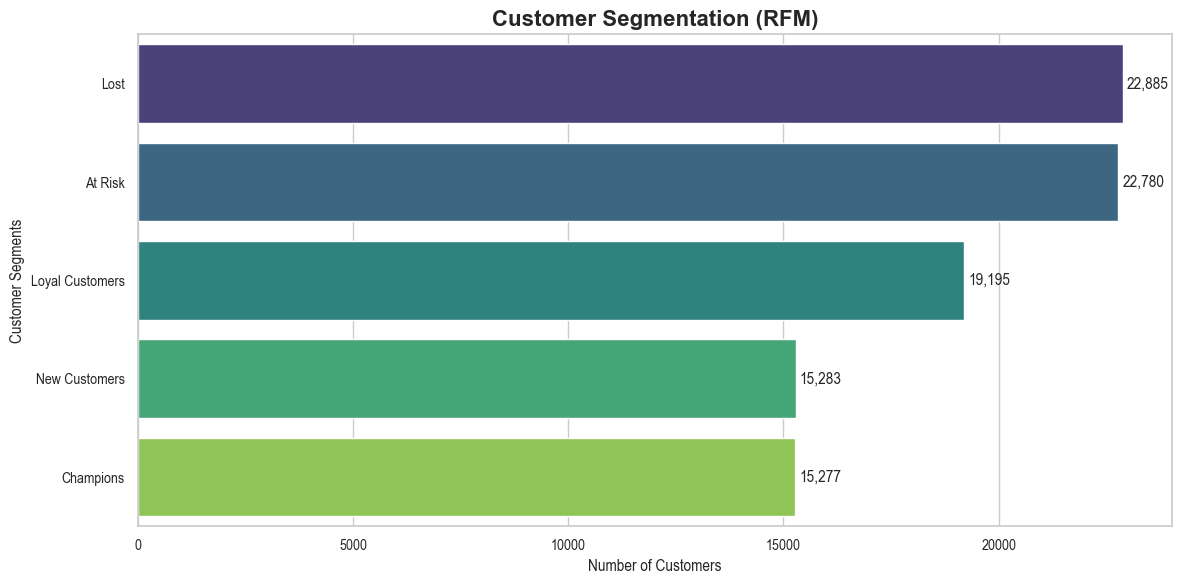

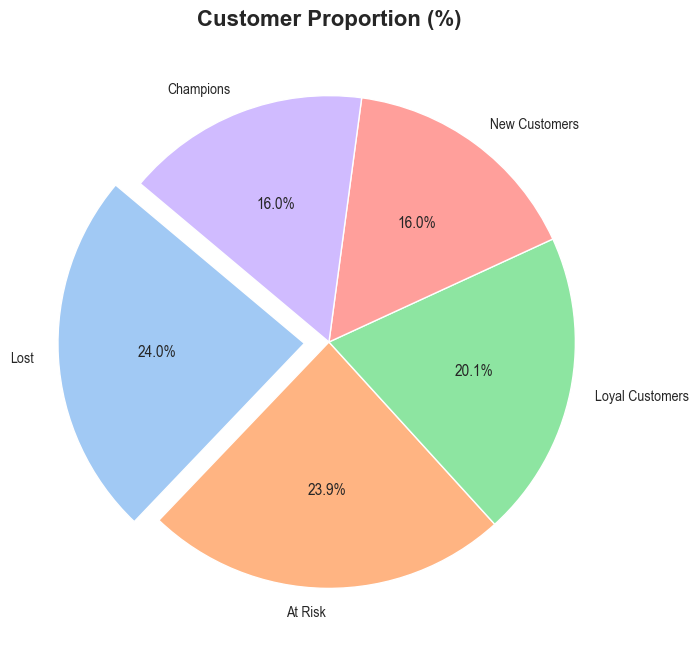

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# เตรียมข้อมูลและเปลี่ยนชื่อ Segment เป็นภาษาอังกฤษ (เฉพาะตอนวาดกราฟ)
plot_data = rfm_table['Segment'].value_counts().reset_index()
plot_data.columns = ['Segment', 'Count']

# สร้าง Dictionary เพื่อเปลี่ยนชื่อ
name_map = {
    'Champions (สุดยอดลูกค้า)': 'Champions',
    'Loyal Customers (ขาประจำ)': 'Loyal Customers',
    'New Customers (ลูกค้าใหม่)': 'New Customers',
    'At Risk (เริ่มห่างเหิน)': 'At Risk',
    'Lost (ขาจรที่หายไป)': 'Lost'
}
plot_data['Segment'] = plot_data['Segment'].map(name_map)

# วาดกราฟแท่ง (Bar Chart) - คราวนี้จะไม่มี Error เพราะเป็นภาษาอังกฤษหมดแล้ว
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Count', y='Segment', data=plot_data, hue='Segment', palette='viridis', legend=False)

for i in ax.containers:
    ax.bar_label(i, padding=3, fmt='{:,.0f}')

plt.title('Customer Segmentation (RFM)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segments')
plt.tight_layout()
plt.show()

# วาดกราฟวงกลม (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(plot_data['Count'], labels=plot_data['Segment'], autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette('pastel'), explode=[0.1, 0, 0, 0, 0])

plt.title('Customer Proportion (%)', fontsize=16, fontweight='bold')
plt.show()